In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred_test = xgb_stress.predict(X_test)

# Calcular las métricas de evaluación para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Imprimir las métricas para el conjunto de prueba
print(f"Métricas en el conjunto de prueba:")
print(f"Error Cuadrático Medio (MSE): {mse_test}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_test}")
print(f"R-cuadrado (R^2): {r2_test}")
print(f"Error Absoluto Medio (MAE): {mae_test}")

Métricas en el conjunto de prueba:
Error Cuadrático Medio (MSE): 1.7644444216392332
Raíz del Error Cuadrático Medio (RMSE): 1.3283239144272128
R-cuadrado (R^2): 0.5965817745344132
Error Absoluto Medio (MAE): 1.0696084794944989


In [1]:
!pip install xgboost
!pip install optuna

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import xgboost as xgb
import optuna
import pickle

from utils import *
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

c:\Users\Pablo\anaconda3\envs\proyecto_keepcoding\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_estres = pd.read_csv('SWELLdata.csv', decimal=",", delimiter=";")

In [3]:
formateo_fechas(df_estres)

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,...,WristLeft_HandLeftPlaneYZAxisZstdv,ShoulderRight_ElbowRightPlaneZXAxisXstdv,ShoulderRight_ElbowRightPlaneXYAxisYstdv,ShoulderRight_ElbowRightPlaneYZAxisZstdv,ElbowRight_WristRightPlaneZXAxisXstdv,ElbowRight_WristRightPlaneXYAxisYstdv,ElbowRight_WristRightPlaneYZAxisZstdv,WristRight_HandRightPlaneZXAxisXstdv,WristRight_HandRightPlaneXYAxisYstdv,WristRight_HandRightKinectZAxisstdv
0,PP1,1,R,2012-09-18 13:16:00,NaN,NaN,NaN,NaN,NaN,NaN,...,166.872086,22.946337,5.605230,13.237048,30.932939,102.460262,8.444481,54.436879,75.886750,155.734343
1,PP1,1,R,2012-09-18 13:17:00,NaN,NaN,NaN,NaN,NaN,NaN,...,58.237714,7.194860,2.468881,3.886001,2.000359,3.431337,1.160298,4.579341,2.868843,171.486911
2,PP1,1,R,2012-09-18 13:18:00,NaN,NaN,NaN,NaN,NaN,NaN,...,64.548824,14.726365,2.953021,9.185623,13.379140,48.162012,30.508877,23.013755,30.629061,149.748809
3,PP1,1,R,2012-09-18 13:19:00,NaN,NaN,NaN,NaN,NaN,NaN,...,38.209895,2.542686,1.564318,2.453674,4.796273,8.223865,1.114906,3.854074,4.048611,173.149430
4,PP1,1,R,2012-09-18 13:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,80.171422,9.905241,20.342488,5.552234,7.198096,22.942488,46.386278,17.514534,29.702675,165.368301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,PP25,3,T,2012-11-07 16:15:00,9.0,8.0,9.0,0.3,2.7,3.6,...,103.650684,36.355940,5.323538,17.908446,56.076888,124.607529,15.482486,87.838259,158.284130,38.905423
3135,PP25,3,T,2012-11-07 16:16:00,9.0,8.0,9.0,0.3,2.7,3.6,...,26.334438,14.714479,1.848907,3.908359,34.878709,159.984897,5.233569,63.512098,164.607803,27.895148
3136,PP25,3,T,2012-11-07 16:17:00,9.0,8.0,9.0,0.3,2.7,3.6,...,15.970939,22.742133,3.048023,6.468803,53.988308,169.548392,10.757358,60.488127,142.557094,21.761699
3137,PP25,3,T,2012-11-07 16:18:00,9.0,8.0,9.0,0.3,2.7,3.6,...,38.797002,28.595668,27.981837,8.424373,43.183524,55.599939,14.620391,72.590531,163.087296,28.944050


In [4]:
clasificar_momento_dia(df_estres)

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,...,ShoulderRight_ElbowRightPlaneZXAxisXstdv,ShoulderRight_ElbowRightPlaneXYAxisYstdv,ShoulderRight_ElbowRightPlaneYZAxisZstdv,ElbowRight_WristRightPlaneZXAxisXstdv,ElbowRight_WristRightPlaneXYAxisYstdv,ElbowRight_WristRightPlaneYZAxisZstdv,WristRight_HandRightPlaneZXAxisXstdv,WristRight_HandRightPlaneXYAxisYstdv,WristRight_HandRightKinectZAxisstdv,momento_dia
0,PP1,1,R,2012-09-18 13:16:00,NaN,NaN,NaN,NaN,NaN,NaN,...,22.946337,5.605230,13.237048,30.932939,102.460262,8.444481,54.436879,75.886750,155.734343,tarde
1,PP1,1,R,2012-09-18 13:17:00,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194860,2.468881,3.886001,2.000359,3.431337,1.160298,4.579341,2.868843,171.486911,tarde
2,PP1,1,R,2012-09-18 13:18:00,NaN,NaN,NaN,NaN,NaN,NaN,...,14.726365,2.953021,9.185623,13.379140,48.162012,30.508877,23.013755,30.629061,149.748809,tarde
3,PP1,1,R,2012-09-18 13:19:00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.542686,1.564318,2.453674,4.796273,8.223865,1.114906,3.854074,4.048611,173.149430,tarde
4,PP1,1,R,2012-09-18 13:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,9.905241,20.342488,5.552234,7.198096,22.942488,46.386278,17.514534,29.702675,165.368301,tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,PP25,3,T,2012-11-07 16:15:00,9.0,8.0,9.0,0.3,2.7,3.6,...,36.355940,5.323538,17.908446,56.076888,124.607529,15.482486,87.838259,158.284130,38.905423,tarde
3135,PP25,3,T,2012-11-07 16:16:00,9.0,8.0,9.0,0.3,2.7,3.6,...,14.714479,1.848907,3.908359,34.878709,159.984897,5.233569,63.512098,164.607803,27.895148,tarde
3136,PP25,3,T,2012-11-07 16:17:00,9.0,8.0,9.0,0.3,2.7,3.6,...,22.742133,3.048023,6.468803,53.988308,169.548392,10.757358,60.488127,142.557094,21.761699,tarde
3137,PP25,3,T,2012-11-07 16:18:00,9.0,8.0,9.0,0.3,2.7,3.6,...,28.595668,27.981837,8.424373,43.183524,55.599939,14.620391,72.590531,163.087296,28.944050,tarde


In [5]:
#liminamos columnas que no son compatibles con nuestro problema ya que no tendremos esas features en nuestro datos de entrada de nuestra APP
columnas_a_eliminar = ['timestamp','HR','RMSSD', 'RMSSD','SCL','Valence_rc','Arousal_rc','Dominance','MentalEffort','MentalDemand','PhysicalDemand','TemporalDemand','Effort','Performance_rc','Frustration','NasaTLX','Squality','Sneutral','Shappy','Ssad','Sangry','Ssurprised','Sscared','Sdisgusted','Svalence']
df_estres = eliminar_columnas(df_estres, columnas_a_eliminar)

Se eliminaron las columnas: ['timestamp', 'HR', 'RMSSD', 'RMSSD', 'SCL', 'Valence_rc', 'Arousal_rc', 'Dominance', 'MentalEffort', 'MentalDemand', 'PhysicalDemand', 'TemporalDemand', 'Effort', 'Performance_rc', 'Frustration', 'NasaTLX', 'Squality', 'Sneutral', 'Shappy', 'Ssad', 'Sangry', 'Ssurprised', 'Sscared', 'Sdisgusted', 'Svalence']


In [6]:
#Filtramos para condición R no esté
df_estres = df_estres[df_estres['Condition'] != 'R']

In [7]:
#Mover columna momento_día a la cuarta posición
cols = list(df_estres.columns)
momento_dia_index = cols.index('momento_dia')
cols.pop(momento_dia_index)
cols.insert(3, 'momento_dia')
df_estres = df_estres[cols]

In [8]:
#Filtramos para condición momento_día_noche no este (solo hay 2)
df_estres = df_estres[df_estres['momento_dia'] != 'noche']

In [9]:
##Separar train y test opr PP (es decir persona)
#train_mask = df_estres['PP'].isin([f'PP{i}' for i in range(1, 21)])
#test_mask = df_estres['PP'].isin([f'PP{i}' for i in range(21, 26)])
#
#X_train = df_estres[train_mask].drop('Stress', axis=1)
#y_train = df_estres.loc[train_mask, 'Stress']
#X_test = df_estres[test_mask].drop('Stress', axis=1)
#y_test = df_estres.loc[test_mask, 'Stress']

In [10]:
#Dividir los datos mezclandolos
X = df_estres.drop('Stress', axis=1)
y = df_estres['Stress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [11]:
#Análisis exploratorio X_Train e y_train
pd.set_option("display.max_rows", None)
#Anlanlisis valores nulos
evaluar_datos_faltantes(X_train)

,Columna,Valores Faltantes,Porcentaje (%)
ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,424,19.739292
ShoulderLeft_ElbowLeftPlaneYZAxisZstdv,ShoulderLeft_ElbowLeftPlaneYZAxisZstdv,401,18.668529
leftShoulderAnglestdv,leftShoulderAnglestdv,378,17.597765
ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,378,17.597765
ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,333,15.502793
WristLeft_HandLeftPlaneYZAxisZstdv,WristLeft_HandLeftPlaneYZAxisZstdv,327,15.223464
ElbowLeft_WristLeftPlaneYZAxisZstdv,ElbowLeft_WristLeftPlaneYZAxisZstdv,323,15.037244
ShoulderLeft_ElbowLeftPlaneXYAxisYstdv,ShoulderLeft_ElbowLeftPlaneXYAxisYstdv,323,15.037244
ShoulderRight_ElbowRightPlaneZXAxisXstdv,ShoulderRight_ElbowRightPlaneZXAxisXstdv,312,14.525140
ShoulderRight_ElbowRightPlaneYZAxisZstdv,ShoulderRight_ElbowRightPlaneYZAxisZstdv,308,14.338920


In [12]:
columnas_a_eliminar = ['PP']
X_train = eliminar_columnas(X_train, columnas_a_eliminar)

Se eliminaron las columnas: ['PP']


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 244 to 3051
Columns: 147 entries, Blok to WristRight_HandRightKinectZAxisstdv
dtypes: float64(144), int64(1), object(2)
memory usage: 2.4+ MB


In [14]:
#Imputación con media, mediana o moda de nulo en X_train
stats_X_train = X_train.describe().T[['mean', '50%']].assign(mode=X_train.mode().iloc[0])

imputed_values = {}

for col in X_train.columns:
    if col in stats_X_train.index:  # Asegurar que la columna tiene estadísticas disponibles
        moda = stats_X_train.loc[col, 'mode']
        mediana = stats_X_train.loc[col, '50%']
        media = stats_X_train.loc[col, 'mean']

        if moda != 0:
            imputed_values[col] = X_train[col].fillna(moda)
        elif mediana != 0:
            imputed_values[col] = X_train[col].fillna(mediana)
        else:
            imputed_values[col] = X_train[col].fillna(media)

# Aplicar imputaciones en un solo paso sin modificar directamente el DataFrame original
X_train = X_train.assign(**imputed_values)

In [15]:
#Convertimos variables categoricas a tipo category
for col in ['Blok', 'Condition', 'momento_dia']:
  X_train[col] = X_train[col].astype('category')

In [16]:
#Encoder variables categoricas. Pocas categorias. One_hot encoding
X_train = pd.get_dummies(X_train, columns=['Blok', 'Condition', 'momento_dia'])

In [17]:
# Obtener la matriz de correlación absoluta solo para las columnas numéricas
X_train_num = X_train.select_dtypes(include=['number'])
corr_matrix = X_train_num.corr().abs()

# Eliminar la columna 'Stress' de la matriz de correlación (si está presente)
if 'Stress' in corr_matrix.columns:
    corr_matrix = corr_matrix.drop('Stress', axis=1).drop('Stress', axis=0)

# Seleccionar las columnas con correlación > 0.9 (excepto la diagonal)
high_corr_cols = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.9:
            colname = corr_matrix.columns[i]
            high_corr_cols.add(colname)

# Eliminar las columnas redundantes en X_train
X_train.drop(columns=high_corr_cols, inplace=True)

print(f"Eliminadas {len(high_corr_cols)} columnas altamente correlacionadas entre sí (sin considerar 'Stress').")
print(f"Columnas eliminadas: {list(high_corr_cols)}")

Eliminadas 20 columnas altamente correlacionadas entre sí (sin considerar 'Stress').
Columnas eliminadas: ['HipCenter_SpineSpine_ShoulderCenteravg', 'ShoulderCenter_ShoulderLeftPlaneXYAxisYavg', 'HipCenter_SpinePlaneXYAxisYavg', 'SAu25_LipsPart', 'Spine_ShoulderCenterPlaneXYAxisYstdv', 'ShoulderCenter_ShoulderRightPlaneXYAxisYstdv', 'Spine_ShoulderCenterPlaneYZAxisZavg', 'ShoulderCenter_ShoulderRightPlaneZXAxisXavg', 'SnSpaces', 'ShoulderCenter_ShoulderRightPlaneXYAxisYavg', 'ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg', 'ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv', 'ElbowLeft_WristLeftWristLeft_HandLeftavg', 'Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg', 'HipCenter_SpinePlaneYZAxisZavg', 'SnChars', 'ShoulderCenter_ShoulderRightPlaneYZAxisZavg', 'Spine_ShoulderCenterPlaneYZAxisZstdv', 'Spine_ShoulderCenterShoulderCenter_Headavg', 'Spine_ShoulderCenterPlaneXYAxisYavg']


In [18]:
#obtener columnas de X_train
columnas_X_train = X_train.columns
columnas_X_train

Index(['SyHeadOrientation', 'SxHeadOrientation', 'SzHeadOrientation',
       'SmouthOpen', 'SleftEyeClosed', 'SrightEyeClosed',
       'SleftEyebrowLowered', 'SleftEyebrowRaised', 'SrightEyebrowLowered',
       'SrightEyebrowRaised',
       ...
       'WristRight_HandRightPlaneXYAxisYstdv',
       'WristRight_HandRightKinectZAxisstdv', 'Blok_1', 'Blok_2', 'Blok_3',
       'Condition_I', 'Condition_N', 'Condition_T', 'momento_dia_mañana',
       'momento_dia_tarde'],
      dtype='object', length=132)

In [19]:
#Eliminamos las mismas columnas que en X_test
columnas_a_eliminar = ['PP']+list(high_corr_cols)
X_test = eliminar_columnas(X_test, columnas_a_eliminar)
#X_test.drop(columns=high_corr_cols, inplace=True)


Se eliminaron las columnas: ['PP', 'HipCenter_SpineSpine_ShoulderCenteravg', 'ShoulderCenter_ShoulderLeftPlaneXYAxisYavg', 'HipCenter_SpinePlaneXYAxisYavg', 'SAu25_LipsPart', 'Spine_ShoulderCenterPlaneXYAxisYstdv', 'ShoulderCenter_ShoulderRightPlaneXYAxisYstdv', 'Spine_ShoulderCenterPlaneYZAxisZavg', 'ShoulderCenter_ShoulderRightPlaneZXAxisXavg', 'SnSpaces', 'ShoulderCenter_ShoulderRightPlaneXYAxisYavg', 'ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg', 'ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv', 'ElbowLeft_WristLeftWristLeft_HandLeftavg', 'Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg', 'HipCenter_SpinePlaneYZAxisZavg', 'SnChars', 'ShoulderCenter_ShoulderRightPlaneYZAxisZavg', 'Spine_ShoulderCenterPlaneYZAxisZstdv', 'Spine_ShoulderCenterShoulderCenter_Headavg', 'Spine_ShoulderCenterPlaneXYAxisYavg']


In [20]:
#Imputación con media, mediana o moda de nulo en X_test
stats_X_test = X_test.describe().T[['mean', '50%']].assign(mode=X_test.mode().iloc[0])

imputed_values = {}

for col in X_test.columns:
    if col in stats_X_test.index:  # Asegurar que la columna tiene estadísticas disponibles
        moda = stats_X_test.loc[col, 'mode']
        mediana = stats_X_test.loc[col, '50%']
        media = stats_X_test.loc[col, 'mean']

        if moda != 0:
            imputed_values[col] = X_test[col].fillna(moda)
        elif mediana != 0:
            imputed_values[col] = X_test[col].fillna(mediana)
        else:
            imputed_values[col] = X_test[col].fillna(media)

# Aplicar imputaciones en un solo paso sin modificar directamente el DataFrame original
X_test = X_test.assign(**imputed_values)

In [21]:
for col in ['Blok', 'Condition', 'momento_dia']:
  X_test[col] = X_test[col].astype('category')

In [22]:
X_test = pd.get_dummies(X_test, columns=['Blok', 'Condition', 'momento_dia'])

In [37]:
#Optuna Prueba_2
import optuna
import xgboost as xgb
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def objective_xgb_stress(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 150),#Comparo valores max. 300, 200,150
        "max_depth": trial.suggest_int("max_depth", 2, 4),#Comparo valores max. 10, 5,4
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.03),#Comparo valores max. 10, 0.05, 0.03
        "subsample": trial.suggest_float("subsample", 0.3, 0.7),#Comparo valores max. 1, 0.8, 0.7
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 0.8),#Comparo valores max. 0.7, 0.9, 0.8
        "reg_lambda": trial.suggest_float("reg_lambda", 1.0, 100.0, log=True),#Comparo valores max. 1.0
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 10.0, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 5, 10),
        "gamma": trial.suggest_float("gamma", 0.5, 1.0),
    }

    model = xgb.XGBRegressor(objective="reg:squarederror", **params)

    # Validación cruzada
    kf = KFold(n_splits=3)

    best_score = float('inf')  # Inicializar con infinito para la primera comparación
    n_rounds_without_improvement = 0

    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
        score = mean_absolute_error(y_val_fold, model.predict(X_val_fold))

        if score < best_score:  # Si el score mejora
            best_score = score
            n_rounds_without_improvement = 0
        else:
            n_rounds_without_improvement += 1

        # Early stopping con Optuna
        if n_rounds_without_improvement >= 10:  # Detener si no hay mejora en 10 rondas
            trial.report(best_score, i)  # Reportar el mejor score alcanzado

            if trial.should_prune():  # Verificar si Optuna recomienda detener el trial
                raise optuna.TrialPruned()
            break

    return best_score  # Devolver el mejor score alcanzado

# Crear el estudio de Optuna y optimizar
study_xgb_stress = optuna.create_study(
    direction="minimize",
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10, interval_steps=1) # Agregar un pruner (opcional)
)
study_xgb_stress.optimize(objective_xgb_stress, n_trials=500)

# Obtener los mejores hiperparámetros
best_params_xgb_stress = study_xgb_stress.best_params

[I 2025-03-19 12:52:26,088] A new study created in memory with name: no-name-999fa1ad-8572-4cf9-b744-ae049cd4abcb
[I 2025-03-19 12:52:30,165] Trial 0 finished with value: 1.3994079089697513 and parameters: {'n_estimators': 121, 'max_depth': 4, 'learning_rate': 0.01582854955948742, 'subsample': 0.31701772574876586, 'colsample_bytree': 0.7849670889663275, 'reg_lambda': 67.19052674762409, 'reg_alpha': 9.423214205885166, 'min_child_weight': 8, 'gamma': 0.6084348057557236}. Best is trial 0 with value: 1.3994079089697513.
[I 2025-03-19 12:52:31,508] Trial 1 finished with value: 1.3933304027472129 and parameters: {'n_estimators': 51, 'max_depth': 3, 'learning_rate': 0.02998563879216252, 'subsample': 0.6816241357361553, 'colsample_bytree': 0.5151349185353841, 'reg_lambda': 31.45864162030077, 'reg_alpha': 3.3072071111102668, 'min_child_weight': 10, 'gamma': 0.5583522228561753}. Best is trial 1 with value: 1.3933304027472129.
[I 2025-03-19 12:52:35,165] Trial 2 finished with value: 1.41422669627

---------Código Pablo---------

Para no correr Optuna de nuevo voy a entrenar con los hiperoarámetros guardados en el excel. 

1. Guardar modelo y métricas con hiperparámetros P3

In [23]:
# Hiperparámetros óptimos de P3
best_params = {'n_estimators': 144, 
               'max_depth': 4, 
               'learning_rate': 0.02928947348634358, 
               'subsample': 0.6839171426671771, 
               'colsample_bytree': 0.7849449085327913, 
               'reg_lambda': 1.4331398962320347, 
               'reg_alpha': 0.2753147917266039, 
               'min_child_weight': 5, 
               'gamma': 0.6505640521246205}

# Entrenar modelo con hiperparámetros óptimos
xgb_stress_2 = xgb.XGBRegressor(objective="reg:squarederror", **best_params)
xgb_stress_2.fit(X_train, y_train)

#Predicciones en el conjunto de entrenamiento
y_pred_train = xgb_stress_2.predict(X_train)
#calcular las métricas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)


# Predicciones en el conjunto de prueba
y_pred_test = xgb_stress_2.predict(X_test)
# Calcular las métricas para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Guardar modelo en un archivo .pkl
with open("xgb_stress_2.pkl", "wb") as f:
    pickle.dump(xgb_stress_2, f)

# Guardar los parámetros y métricas en un archivo JSON
results = {
    "best_params": best_params,
    "mse_train": mse_train,
    "rmse_train": rmse_train,
    "r2_train": r2_train,
    "mae_train": mae_train,
    "mse_test": mse_test,
    "rmse_test": rmse_test,
    "r2_test": r2_test,
    "mae_test": mae_test
}

with open("results_xgb_stress_2.json", "w") as f:
    json.dump(results, f, indent=4)

# Guardaer columnas de X_train en un archivo txt
with open("XGboost_columns_x_train.txt", "w") as f:
    f.write("\n".join(columnas_X_train))


-------------Código Fermando ----------

In [ ]:
#Entrenar Modelo con los Mejores Parámetros
xgb_stress = xgb.XGBRegressor(objective="reg:squarederror", **best_params_xgb_stress)
xgb_stress.fit(X_train, y_train)

In [39]:
# Hacer predicciones en el conjunto de entrenamiento
y_pred_train = xgb_stress.predict(X_train)

# Calcular las métricas
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Imprimir las métricas
print(f"Métricas en el conjunto de entrenamiento:")
print(f"Error Cuadrático Medio (MSE): {mse_train}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_train}")
print(f"R-cuadrado (R^2): {r2_train}")
print(f"Error Absoluto Medio (MAE): {mae_train}")

Métricas en el conjunto de entrenamiento:
Error Cuadrático Medio (MSE): 0.7648961177264254
Raíz del Error Cuadrático Medio (RMSE): 0.8745833966674793
R-cuadrado (R^2): 0.8367932710816139
Error Absoluto Medio (MAE): 0.6928062333463513


In [40]:
# Hacer predicciones en el conjunto de prueba
y_pred_test = xgb_stress.predict(X_test)

# Calcular las métricas de evaluación para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Imprimir las métricas para el conjunto de prueba
print(f"Métricas en el conjunto de prueba:")
print(f"Error Cuadrático Medio (MSE): {mse_test}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_test}")
print(f"R-cuadrado (R^2): {r2_test}")
print(f"Error Absoluto Medio (MAE): {mae_test}")

Métricas en el conjunto de prueba:
Error Cuadrático Medio (MSE): 1.1310631615533984
Raíz del Error Cuadrático Medio (RMSE): 1.063514532836011
R-cuadrado (R^2): 0.7413965053660024
Error Absoluto Medio (MAE): 0.8542273618142401


In [41]:
results_df = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Muestra la tabla
display(results_df)

,y_test,y_pred_test
2541,2.1,3.132599
1094,3.3,2.133529
1762,3.0,3.314395
2023,6.9,4.909783
2506,2.3,2.582578
2922,5.7,3.478950
873,2.9,3.102908
1089,3.3,2.921315
687,1.3,2.453876
2155,1.3,2.585630


In [42]:
# Obtener la importancia de las features
importance = xgb_stress.feature_importances_

# Crear un DataFrame con las features y su importancia
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

# Ordenar el DataFrame por importancia descendente
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
114,WristLeft_HandLeftPlaneZXAxisXstdv,0.055398
48,leftShoulderAngleavg,0.027307
60,ShoulderCenter_HeadPlaneXYAxisYavg,0.025467
16,SAu05_UpperLidRaiser,0.023341
68,ElbowLeft_WristLeftPlaneXYAxisYavg,0.022735
82,avgDepthstdv,0.020554
61,ShoulderCenter_HeadPlaneYZAxisZavg,0.018887
2,SzHeadOrientation,0.018098
13,SAu01_InnerBrowRaiser,0.017157
7,SleftEyebrowRaised,0.016576


In [31]:
# 1. Crear DataFrame con la importancia de las features
importance = xgb_stress.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 2. Crear DataFrame con las métricas
metrics = {
    'Conjunto': ['Train', 'Test'],
    'MSE': [mse_train, mse_test],
    'RMSE': [rmse_train, rmse_test],
    'R^2': [r2_train, r2_test],
    'MAE': [mae_train, mae_test]
}
metrics_df = pd.DataFrame(metrics)

# 3. Crear DataFrame con los mejores hiperparámetros
best_params_df = pd.DataFrame([study_xgb_stress.best_params], index=['Mejores Hiperparámetros'])

# 4. Concatenar los DataFrames
all_results_df = pd.concat([feature_importance, metrics_df, best_params_df], axis=0) #axis=0 para concatenar verticalmente

# 5. Guardar el DataFrame como un archivo Excel
all_results_df.to_excel('P1_XGB_2.xlsx')

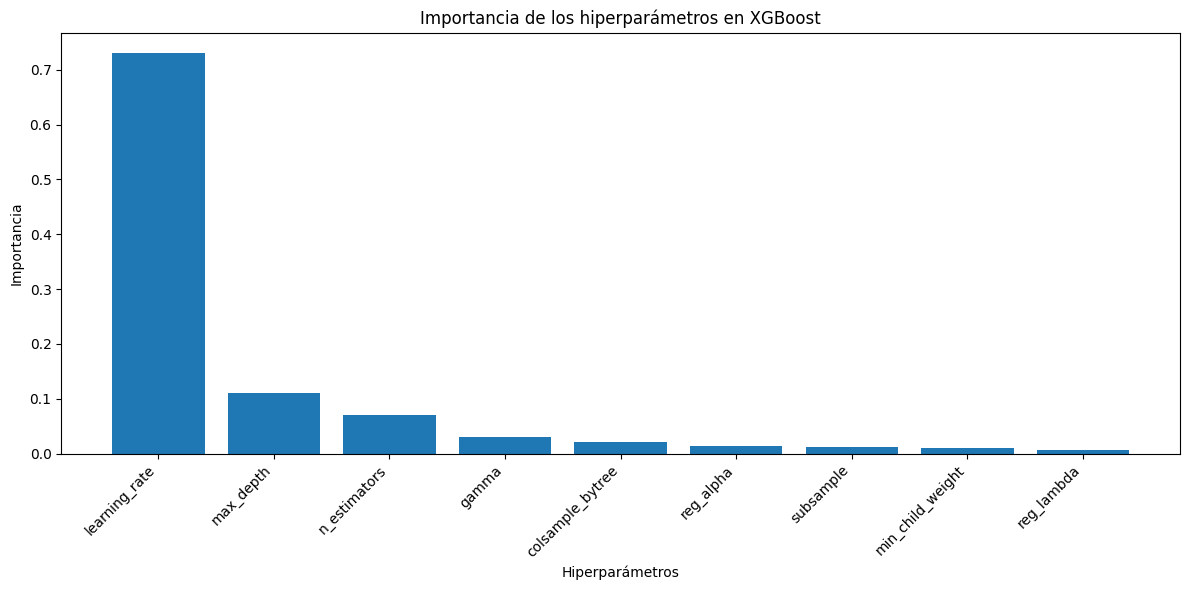

In [49]:
importances = optuna.importance.get_param_importances(study_xgb_stress)

plt.figure(figsize=(12, 6))
plt.bar(importances.keys(), importances.values())
plt.xlabel("Hiperparámetros")
plt.ylabel("Importancia")
plt.title("Importancia de los hiperparámetros en XGBoost")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()